# Analysis of the experiments performed in IBM with Steane Code

In [7]:
import json
import matplotlib.pyplot as plt

### First experiment: $\text{delay\_measureAll.ipynb}$

This experiment consist of encoding a $\ket{0}_L$ state in the Steane Code, add a time delay and measure the seven qubits of the code in the computational basis. The results of the experiments are in the JSON file $\text{delay\_measureAll\_noCorrection.json}$.

- key 'ibm_sherbrooke measures' : JSON where the keys are the dt's and the values are the corresponding JSON obtained with get_counts() function.
- key 'ibm_sherbrooke experiment data': JSON where the keys are the dt's and the values are a JSON with 'depth', 'shots' and 'error rate' as keys

In [108]:
# Opening JSON file
json_file = "delay_measureAll_noCorrection.json"

with open(json_file) as f:
    data = json.load(f)


measures = data['ibm_sherbrooke measures']
experiment_data = data['ibm_sherbrooke experiment data']


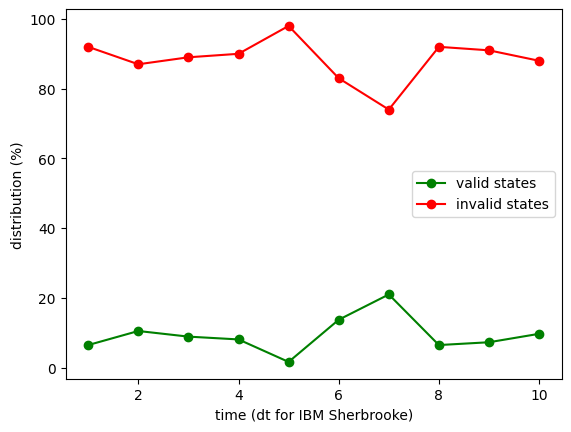

In [109]:
# For each time dt select valid states vs non-valid states:
valid_states = ['0000000', '0001111', '0110011', '0111100', '1010101', '1011010', '1100110', '1101001']

dt = []
valid = []
invalid = []

for i in measures.keys():
    dt.append(int(i))
    shots_i = experiment_data[i]['shots']
    measure_i = measures[i]
    
    valid_i = 0
    for k in measure_i.keys():
        if k in valid_states:
            valid_i += measure_i[k]


    valid.append(100 * valid_i/shots_i)
    invalid.append(100 - valid_i)


min_dt = 0
max_dt = 10

plt.plot(dt[min_dt:max_dt], valid[min_dt:max_dt], 'o-g', label = 'valid states') # 'o-g' ~ 'marker|line|color' = 'o|-|green'
plt.plot(dt[min_dt:max_dt], invalid[min_dt:max_dt], 'o-r', label = 'invalid states')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("distribution (%)")

plt.show()


In [110]:
# Create Dict of all binary string of length 7:
bin_dict = {}

n = 7

for i in range(2**n):
    s = bin(i)
    s = s.split('b')[1]
    s = '0'*(n - len(s)) + s
    bin_dict[s] = []

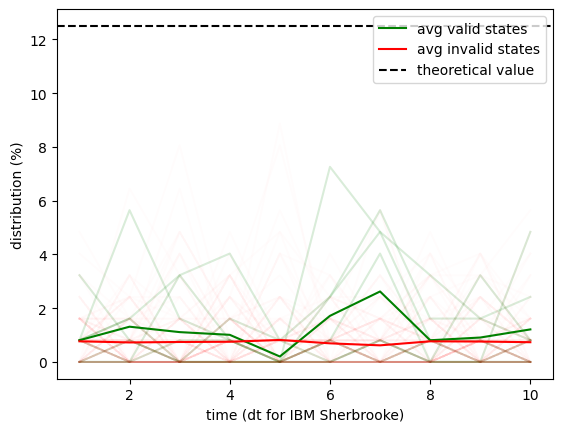

In [111]:
# Compute mean_valid, mean_invalid and the list of measure counts for each binary string on bin_dict 
mean_valid = []
mean_invalid = []

for i in measures.keys():
    shots_i = experiment_data[i]['shots']
    measure_i = measures[i]
    
    valid_i = 0

    for k in bin_dict.keys():
        if k in measure_i.keys():
            if k in valid_states:
                valid_i += measure_i[k]

            bin_dict[k].append(100 * measure_i[k]/shots_i)

        else:
            bin_dict[k].append(0)


    mean_valid.append(100 * valid_i/(shots_i * len(valid_states)))
    mean_invalid.append((100 - valid_i)/(2**n - len(valid_states)))


# Plot avg valid states vs avg invalid states graph
for k in bin_dict.keys():
    if k in valid_states:
        plt.plot(dt[min_dt:max_dt], bin_dict[k][min_dt:max_dt], '-g', alpha = 0.15)

    else:
        plt.plot(dt[min_dt:max_dt], bin_dict[k][min_dt:max_dt], '-r', alpha = 0.01)


plt.plot(dt[min_dt:max_dt], mean_valid[min_dt:max_dt], '-g', label = 'avg valid states')
plt.plot(dt[min_dt:max_dt], mean_invalid[min_dt:max_dt], '-r', label = 'avg invalid states')
plt.axhline(y=100/len(valid_states), color='k', linestyle='--', label='theoretical value')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("distribution (%)")


plt.show()


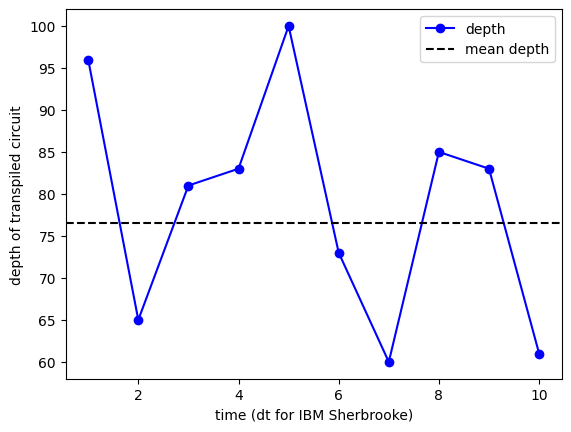

In [117]:
# Mean Depth:
depth = []

for i in measures.keys():
    depth_i = experiment_data[i]['depth']
    depth.append(depth_i)

mean_depth = sum(depth)/len(depth)


plt.plot(dt[min_dt:max_dt], depth[min_dt:max_dt], 'o-b', label = 'depth')
plt.axhline(y=mean_depth, color='k', linestyle='--', label='mean depth')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("depth of transpiled circuit")

plt.show()


### Second experiment: $\text{delay\_measureZL.ipynb - experiment 1}$

This experiment consist of encoding a $\ket{0}_L$ state in the Steane Code, add a time delay and measure in the observable $Z_L$ using an ancilla qubit. The results of the experiments are in the JSON file $\text{delay\_measureZL\_noCorrection.json}$.

- key 'ibm_sherbrooke measures' : JSON where the keys are the dt's and the values are the corresponding JSON obtained with get_counts() function.
- key 'ibm_sherbrooke experiment data': JSON where the keys are the dt's and the values are a JSON with 'depth', 'shots' and 'error rate', 'optimization_level' and 'scheduling_method' as keys.

In [118]:
# Opening JSON file
json_file = "delay_measureZL_noCorrection.json"

with open(json_file) as f:
    data = json.load(f)


measures = data['ibm_sherbrooke measures']
experiment_data = data['ibm_sherbrooke experiment data']

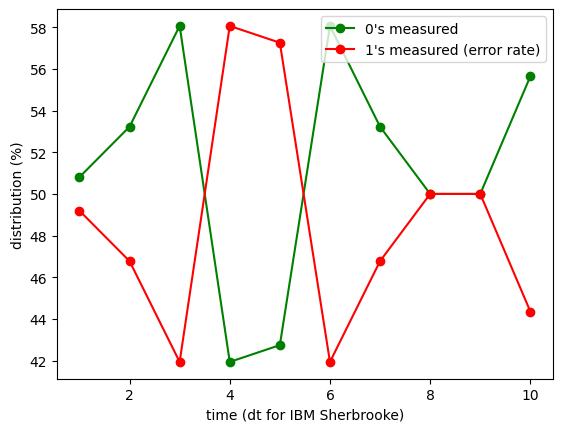

In [119]:
dt = []
zeros = []
ones = []

for i in measures.keys():
    dt.append(int(i))

    shots_i = experiment_data[i]['shots']

    zeros_i = 100 * (measures[i]['0']/shots_i)
    ones_i = 100 - zeros_i

    zeros.append(zeros_i)
    ones.append(ones_i)



min_dt = 0
max_dt = 10


plt.plot(dt[min_dt:max_dt], zeros[min_dt:max_dt], 'o-g', label = '0\'s measured')
plt.plot(dt[min_dt:max_dt], ones[min_dt:max_dt], 'o-r', label = '1\'s measured (error rate)')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("distribution (%)")

plt.show()

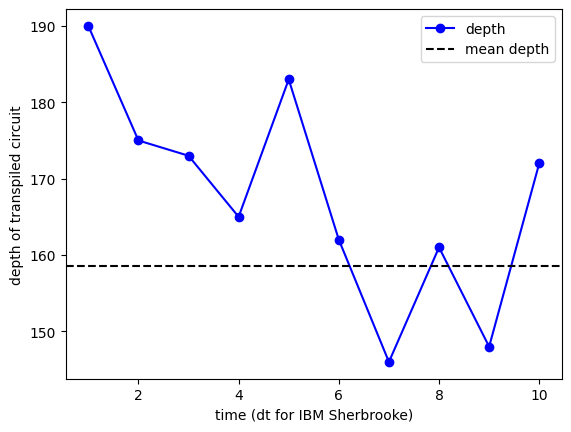

In [120]:
# Mean Depth:
depth = []

for i in measures.keys():
    depth_i = experiment_data[i]['depth']
    depth.append(depth_i)

mean_depth = sum(depth)/len(depth)


plt.plot(dt[min_dt:max_dt], depth[min_dt:max_dt], 'o-b', label = 'depth')
plt.axhline(y=mean_depth, color='k', linestyle='--', label='mean depth')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("depth of transpiled circuit")

plt.show()

### Third experiment: $\text{delay\_measureZL.ipynb - experiment 2}$

This experiment consist of encoding a $\ket{0}_L$ state in the Steane Code, add a time delay and measure in the observable $Z_L$ using an ancilla qubit. The results of the experiments are in the JSON file $\text{delay\_measureZL\_Correction.json}$.

- key 'ibm_sherbrooke measures' : JSON where the keys are the dt's and the values are the corresponding JSON obtained with get_counts() function.
- key 'ibm_sherbrooke experiment data': JSON where the keys are the dt's and the values are a JSON with 'depth', 'shots' and 'error rate', 'optimization_level' and 'scheduling_method' as keys.

In [121]:
# Opening JSON file
json_file = "delay_measureZL_Correction.json"

with open(json_file) as f:
    data = json.load(f)


measures = data['ibm_sherbrooke measures']
experiment_data = data['ibm_sherbrooke experiment data']

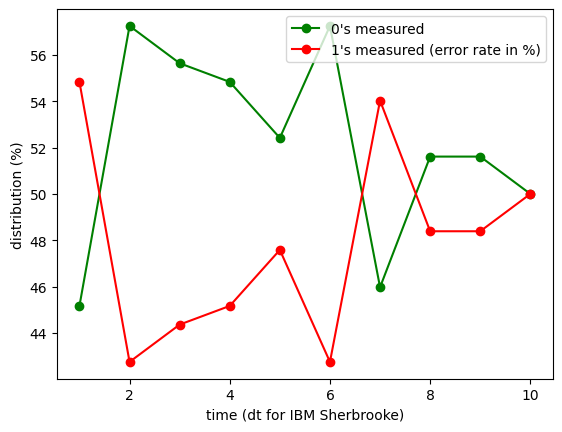

In [128]:
dt = []
zeros = []
ones = []

for i in measures.keys():
    dt.append(int(i))

    shots_i = experiment_data[i]['shots']

    zeros_i = 100 * (measures[i]['0']/shots_i)
    ones_i = 100 - zeros_i

    zeros.append(zeros_i)
    ones.append(ones_i)



min_dt = 0
max_dt = 10


plt.plot(dt[min_dt:max_dt], zeros[min_dt:max_dt], 'o-g', label = '0\'s measured')
plt.plot(dt[min_dt:max_dt], ones[min_dt:max_dt], 'o-r', label = '1\'s measured (error rate in %)')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("distribution (%)")

plt.show()

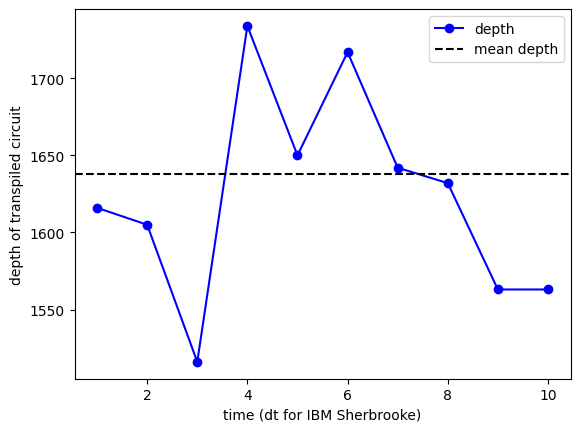

In [127]:
# Mean Depth:
depth = []

for i in measures.keys():
    depth_i = experiment_data[i]['depth']
    depth.append(depth_i)

mean_depth = sum(depth)/len(depth)


plt.plot(dt[min_dt:max_dt], depth[min_dt:max_dt], 'o-b', label = 'depth')
plt.axhline(y=mean_depth, color='k', linestyle='--', label='mean depth')

plt.legend()
plt.xlabel("time (dt for IBM Sherbrooke)")
plt.ylabel("depth of transpiled circuit")


plt.show()